# San Francisco Crime Classification

### 1. Data fields
>#### 1.Dates - timestamp of the crime incident
>#### 2.Category - category of the crime incident (only in train.csv). This is the target variable you are going to predict.
>#### 3.Descript - detailed description of the crime incident (only in train.csv)
>#### 4.DayOfWeek - the day of the week
>#### 5.PdDistrict - name of the Police Department District
>#### 6.Resolution - how the crime incident was resolved (only in train.csv)
>#### 7.Address - the approximate street address of the crime incident 
>#### 8.X - Longitude
>#### 9.Y - Latitude

### 2. Import Libraries

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 3. Load Dataset

In [17]:
train = pd.read_csv('../data/train.csv', parse_dates=['Dates'])

In [18]:
test = pd.read_csv('../data/test.csv', parse_dates=['Dates'])

In [23]:
print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [24]:
print(test.shape)
test.head()

(884262, 7)


,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [22]:
train['Resolution'].unique()

array(['ARREST, BOOKED', 'NONE', 'ARREST, CITED', 'PSYCHOPATHIC CASE',
       'JUVENILE BOOKED', 'UNFOUNDED', 'EXCEPTIONAL CLEARANCE', 'LOCATED',
       'CLEARED-CONTACT JUVENILE FOR MORE INFO', 'NOT PROSECUTED',
       'JUVENILE DIVERTED', 'COMPLAINANT REFUSES TO PROSECUTE',
       'JUVENILE ADMONISHED', 'JUVENILE CITED',
       'DISTRICT ATTORNEY REFUSES TO PROSECUTE',
       'PROSECUTED BY OUTSIDE AGENCY', 'PROSECUTED FOR LESSER OFFENSE'],
      dtype=object)

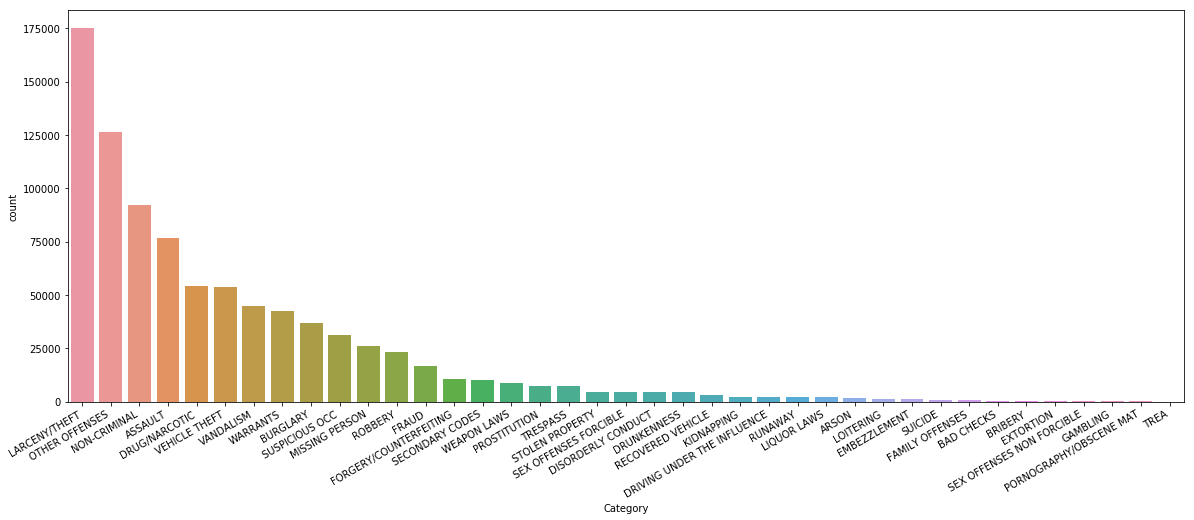

In [60]:
fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(20,8)
fig.autofmt_xdate()
sns.countplot(train['Category'], order=train['Category'].value_counts().index ,ax=ax1)

### 4. Feature Engineering

In [38]:
feature_names =['X', 'Y']
feature_names

['X', 'Y']

In [40]:
train[feature_names].head()

,X,Y
0,-122.425892,37.774599
1,-122.425892,37.774599
2,-122.424363,37.800414
3,-122.426995,37.800873
4,-122.438738,37.771541


In [41]:
x_train = train[feature_names]
x_test = test[feature_names]

In [44]:
print(x_train.shape)
x_train.head()

(878049, 2)


,X,Y
0,-122.425892,37.774599
1,-122.425892,37.774599
2,-122.424363,37.800414
3,-122.426995,37.800873
4,-122.438738,37.771541


In [45]:
print(x_test.shape)
x_test.head()

(884262, 2)


,X,Y
0,-122.399588,37.735051
1,-122.391523,37.732432
2,-122.426002,37.792212
3,-122.437394,37.721412
4,-122.437394,37.721412


In [82]:
label_name ='Category'
y_train = train [label_name]

print(y_train.shape)
print(y_train.nunique())
y_train.head()

(878049,)
39


0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

### 5. Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=37, n_jobs=-1)
#n_jobs : cpu core setting
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=37, verbose=0, warm_start=False)

### 5-1. Cross Validation

In [66]:
from sklearn.model_selection import cross_val_score

%time 
score = cross_val_score(model, x_train, y_train, cv=5, scoring = 'neg_log_loss').mean()
score = score * -1
f"Score = {score:.6f}"

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 9.06 µs


'Score = 6.733904'

### 6. Use LightGBM

In [73]:
from lightgbm import LGBMClassifier
model2 = LGBMClassifier(n_estimators = 15,
                                       random_state = 37
                      )
model2

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=15, n_jobs=-1, num_leaves=31, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### 6-1 Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score

%time 
score = cross_val_score(model2, x_train, y_train, cv=5, scoring = 'neg_log_loss').mean()
score = score * -1
f"Score = {score:.6f}"

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 8.11 µs


'Score = 2.745683'

In [75]:
%time model.fit(x_train, y_train)

CPU times: user 45.4 s, sys: 351 ms, total: 45.7 s
Wall time: 13.4 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=15, n_jobs=-1, num_leaves=31, objective=None,
        random_state=37, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [79]:
predictions1 = model.predict(x_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [81]:
print(predictions1.shape)
predictions1

(884262,)


array(['OTHER OFFENSES', 'OTHER OFFENSES', 'LARCENY/THEFT', ...,
       'OTHER OFFENSES', 'OTHER OFFENSES', 'LARCENY/THEFT'], dtype=object)

In [77]:
predictions = model.predict_proba(x_test)

In [78]:
print(predictions.shape)
predictions[0]

(884262, 39)


array([0.012971  , 0.08017693, 0.01241075, 0.01240801, 0.02545423,
       0.01345177, 0.01365353, 0.02981404, 0.01366396, 0.01285293,
       0.01234409, 0.01264298, 0.01670092, 0.01873471, 0.01228415,
       0.01389817, 0.07078399, 0.01302486, 0.01257929, 0.04180939,
       0.05751659, 0.10780063, 0.01222109, 0.01302374, 0.01613737,
       0.02783017, 0.01365505, 0.02030059, 0.01444428, 0.01237077,
       0.01449048, 0.01243978, 0.03496361, 0.01222084, 0.01512709,
       0.03887362, 0.07579333, 0.02989192, 0.01923934])

In [91]:
submit = pd.DataFrame(predictions,
                     index = test.index,
                     columns = model.classes_)

print(submit.shape)
submit.head()

(884262, 39)


,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0.012971,0.080177,0.012411,0.012408,0.025454,0.013452,0.013654,0.029814,0.013664,0.012853,...,0.012371,0.014490,0.012440,0.034964,0.012221,0.015127,0.038874,0.075793,0.029892,0.019239
1,0.012329,0.076212,0.011797,0.011976,0.026451,0.012786,0.012978,0.066780,0.013079,0.012217,...,0.011759,0.013774,0.011825,0.032970,0.011617,0.014379,0.033755,0.042637,0.049577,0.019939
2,0.012159,0.042482,0.011931,0.011609,0.064567,0.012767,0.012857,0.020586,0.013221,0.012217,...,0.011583,0.015202,0.011794,0.029405,0.011532,0.014845,0.043151,0.058482,0.021961,0.014322
3,0.012718,0.073462,0.011936,0.012067,0.027369,0.012884,0.013002,0.027267,0.013087,0.012307,...,0.011848,0.014923,0.012107,0.032864,0.011705,0.014878,0.044270,0.074928,0.027831,0.019009
4,0.012718,0.073462,0.011936,0.012067,0.027369,0.012884,0.013002,0.027267,0.013087,0.012307,...,0.011848,0.014923,0.012107,0.032864,0.011705,0.014878,0.044270,0.074928,0.027831,0.019009


In [92]:
model.classes_

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES FORCIBLE',
       'SEX OFFENSES NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [94]:
submit.to_csv('../data/submit/baseline_LGBM_181025.csv')

### 7. Visualization

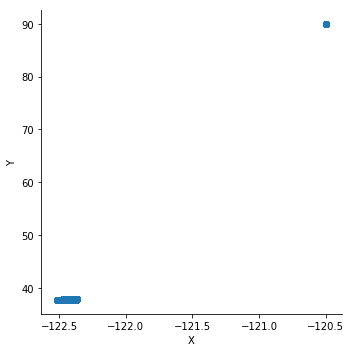

In [104]:
sns.lmplot(data=train, x ='X', y='Y', fit_reg=False)

In [99]:
train['X'].max()

-120.5

In [100]:
train['Y'].max()

90.0

In [101]:
x_outliers = (train['X']==train['X'].max())
y_outliers = (train['Y']==train['Y'].max())

In [115]:
outliers = train[x_outliers & y_outliers]

print(outliers.shape)
outliers

(67, 10)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,AddressType
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,Crossroad
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,Crossroad
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,Crossroad
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,Crossroad
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,Crossroad
667042,2005-11-28 16:04:00,TRESPASS,TRESPASSING,Monday,TENDERLOIN,"ARREST, BOOKED",ELLIS ST / 5THSTNORTH ST,-120.5,90.0,Crossroad
669946,2005-11-14 09:20:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,BAYVIEW,"ARREST, BOOKED",YOSEMITE AV / WILLIAMS AV,-120.5,90.0,Crossroad
671709,2005-11-02 20:30:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Wednesday,CENTRAL,NONE,BRENHAM PL / WASHINGTON ST,-120.5,90.0,Crossroad
673078,2005-10-23 20:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,NONE,AVENUE OF THE PALMS / GEARY BL,-120.5,90.0,Crossroad
673114,2005-10-23 18:11:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,TARAVAL,"ARREST, BOOKED",STCHARLES AV / 19TH AV,-120.5,90.0,Crossroad


In [108]:
train.loc[train['Address'].str.contains('/'), 'AddressType'] ='Crossroad'
train.loc[train['Address'].str.contains('of'), 'AddressType'] ='Block'

In [112]:
train['AddressType'].head()

0    Crossroad
1    Crossroad
2    Crossroad
3        Block
4        Block
Name: AddressType, dtype: object

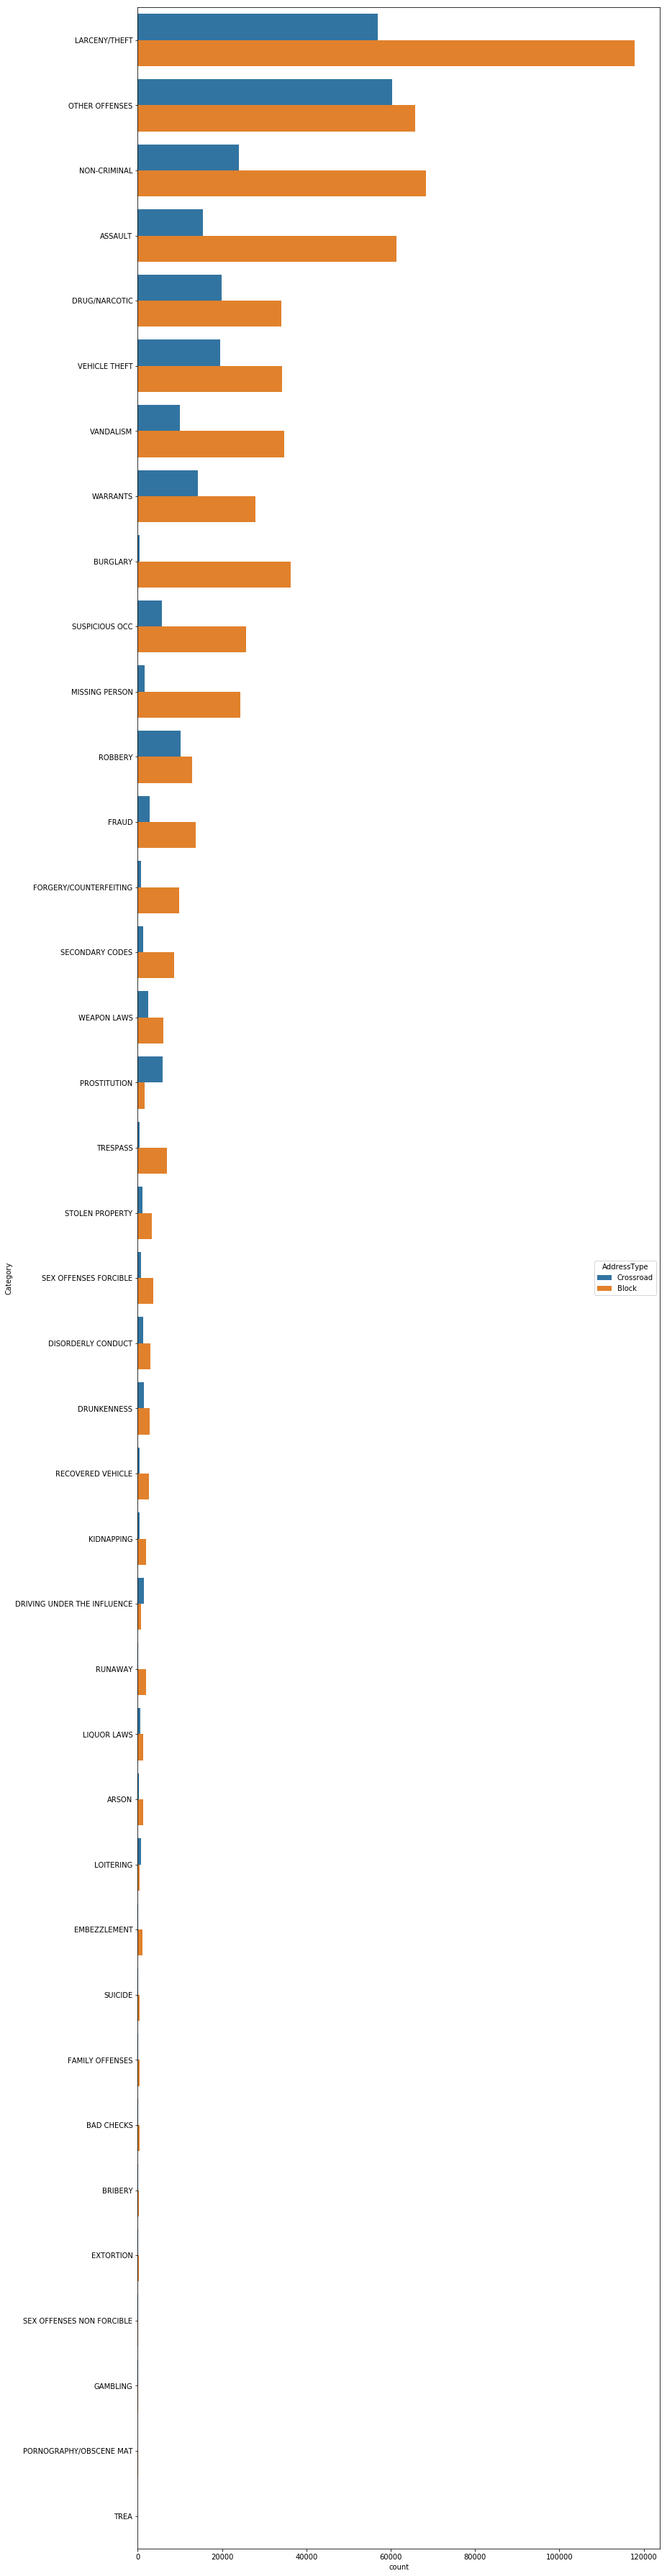

In [120]:
fig, ax1 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(13,65)
sns.countplot(data = train, y='Category', hue='AddressType', order = train['Category'].value_counts().index , ax=ax1)

In [124]:
oak_luguna = train[train['Address'] =='OAK ST / LAGUNA ST']

print(oak_luguna.shape)
oak_luguna.head()

(45, 10)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,AddressType
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,Crossroad
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,Crossroad
12956,2015-03-08 08:50:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Sunday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,Crossroad
27204,2015-01-05 20:00:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Monday,NORTHERN,NONE,OAK ST / LAGUNA ST,-122.425892,37.774599,Crossroad
65580,2014-06-29 17:12:00,DRUG/NARCOTIC,POSSESSION OF MARIJUANA,Sunday,NORTHERN,"ARREST, CITED",OAK ST / LAGUNA ST,-122.425892,37.774599,Crossroad


In [125]:
luguna_oak = train[train['Address'] =='LAGUNA ST / OAK ST']

print(luguna_oak.shape)
luguna_oak.head()

(27, 10)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,AddressType
106008,2013-12-11 16:55:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,NORTHERN,"ARREST, CITED",LAGUNA ST / OAK ST,-122.425892,37.774599,Crossroad
154395,2013-04-30 11:00:00,VEHICLE THEFT,STOLEN MOTORCYCLE,Tuesday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,Crossroad
219632,2012-06-03 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,Crossroad
283267,2011-07-01 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Friday,NORTHERN,NONE,LAGUNA ST / OAK ST,-122.425892,37.774599,Crossroad
314544,2011-01-12 09:15:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,NORTHERN,"ARREST, CITED",LAGUNA ST / OAK ST,-122.425892,37.774599,Crossroad
